Initial Data Shape: (127418, 47)
After Dropping Missing Values: (1100, 47)


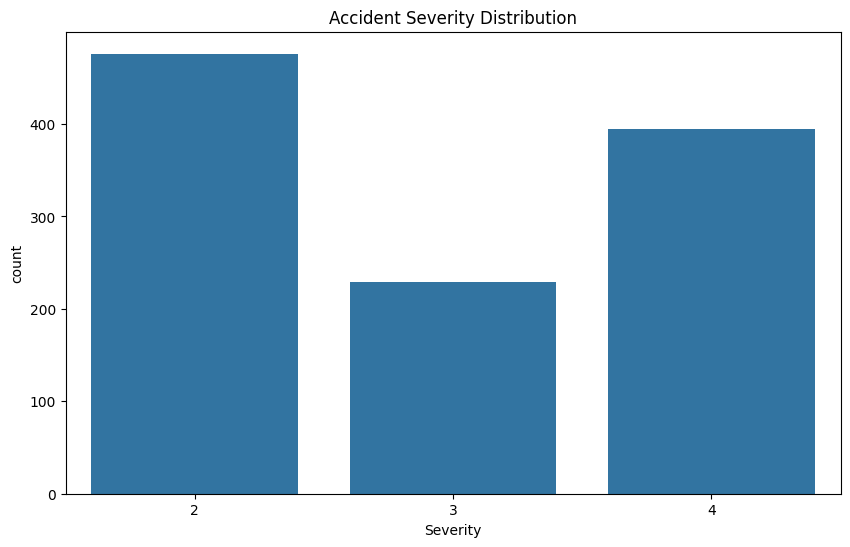

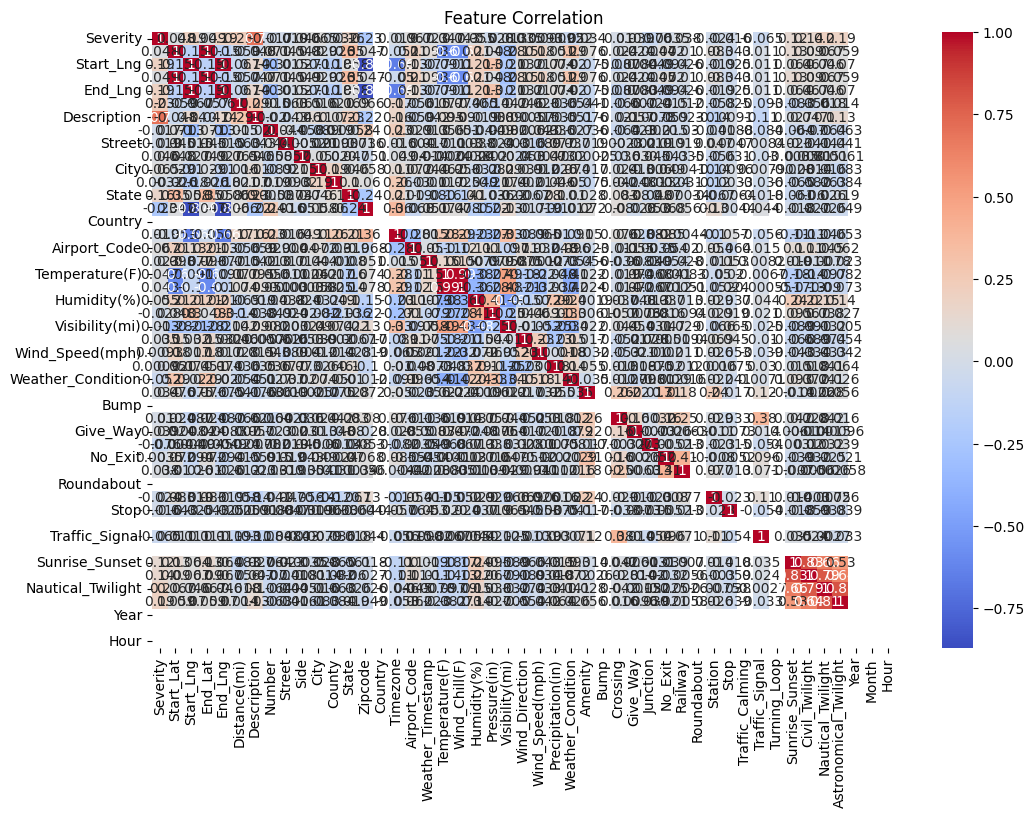

Validation Accuracy: 0.896969696969697
Classification Report:
               precision    recall  f1-score   support

           2       0.84      0.96      0.89        75
           3       0.90      0.66      0.76        41
           4       1.00      1.00      1.00        49

    accuracy                           0.90       165
   macro avg       0.91      0.87      0.88       165
weighted avg       0.90      0.90      0.89       165

Test Accuracy: 0.9181818181818182
Confusion Matrix:
 [[44  1  1]
 [ 7 14  0]
 [ 0  0 43]]
Insights and Recommendations:

1. Severity is influenced by factors like weather, time, and road conditions.
2. Implement warning systems in high-risk areas.
3. Use this model in conjunction with real-time data for dynamic risk prediction.



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/US_Accidents.csv'  # Replace with actual file path
data = pd.read_csv(file_path)

# Data Cleaning & Preprocessing
print("Initial Data Shape:", data.shape)
data = data.dropna()  # Handle missing values
print("After Dropping Missing Values:", data.shape)

# Convert categorical features to numeric
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature Engineering (e.g., extracting time-based features)
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month
data['Hour'] = data['Start_Time'].dt.hour

# Drop irrelevant columns
columns_to_drop = ['Start_Time', 'End_Time', 'ID']  # Modify as per dataset
data = data.drop(columns=columns_to_drop, axis=1)

# Exploratory Data Analysis (Visualization)
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity', data=data)
plt.title('Accident Severity Distribution')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Split Dataset into Train, Validation, and Test Sets
X = data.drop('Severity', axis=1)
y = data['Severity']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Build ML Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Validate the Model
y_val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Test the Model
y_test_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Recommendations
print("Insights and Recommendations:")
print("""
1. Severity is influenced by factors like weather, time, and road conditions.
2. Implement warning systems in high-risk areas.
3. Use this model in conjunction with real-time data for dynamic risk prediction.
""")
